# Paper: Transmission potential of smallpox in contemporary populations

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

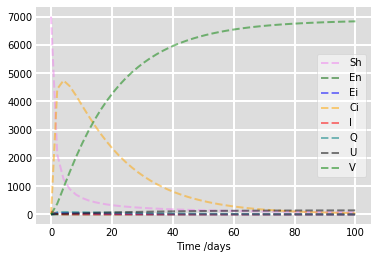

In [2]:
# Initial conditions

S0 = 7000
En0 = 0
Ei0 = 0
Ci0 = 0
I0 = 100
Q0 = 0
U0 = 0
V0 = 0
N = 7000

# A grid of time points (in days)
t = np.linspace(0, 100, 50) 

#parameters
chi_1 = 0.06
chi_2 = 0.04
epsilon_1 = 0.975
epsilon_2 = 0.3
rho = 0.975
theta = 0.95
alpha = 0.0685
gamma = 0.116

# The SIR model differential equations.
def deriv(y, t,N, chi_1 ,chi_2 ,epsilon_1 ,epsilon_2 ,rho ,theta ,alpha ,gamma):
    S ,En ,Ei ,Ci ,I ,Q ,U, V  = y
    phi = I/S
    beta = (10 * gamma)/(phi*N) #R0 = 10

    dSdt = chi_1 * (1-epsilon_1) * Ci - beta * (phi + rho - phi * rho) * S * I
    dEndt = beta * phi * (1-rho)*S*I - alpha*En
    dEidt = beta * phi*rho*S*I - (chi_1*epsilon_2 + alpha*(1-epsilon_2))*Ei
    dCidt = beta*rho*(1-phi)*S*I-chi_1*Ci
    dIdt = alpha*(1-theta)*En- (theta+gamma)*I
    dQdt = alpha*(1-epsilon_2)*Ei+theta*(alpha*En+I)-chi_2*Q
    dUdt = gamma*I+chi_2*Q
    dVdt = chi_1*(epsilon_2*Ei+epsilon_1*Ci) 

    return dSdt  ,dEndt  ,dEidt  ,dCidt  ,dIdt  ,dQdt  ,dUdt  ,dVdt 


# Initial conditions vector
y0 = S0 ,En0 ,Ei0 ,Ci0 ,I0 ,Q0 ,U0, V0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, chi_1 ,chi_2 ,epsilon_1 ,epsilon_2 ,rho ,theta ,alpha ,gamma))
S ,En ,Ei ,Ci ,I ,Q ,U, V  = ret.T

# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'violet', alpha=0.5, lw=2, label='Sh', linestyle='dashed')
ax.plot(t, En, 'darkgreen', alpha=0.5, lw=2, label='En', linestyle='dashed')
ax.plot(t, Ei, 'blue', alpha=0.5, lw=2, label='Ei', linestyle='dashed')
ax.plot(t, Ci, 'orange', alpha=0.5, lw=2, label='Ci', linestyle='dashed')
ax.plot(t, I, 'red', alpha=0.5, lw=2, label='I', linestyle='dashed')
ax.plot(t, Q, 'teal', alpha=0.5, lw=2, label='Q', linestyle='dashed')
ax.plot(t, U, 'black', alpha=0.5, lw=2, label='U', linestyle='dashed')
ax.plot(t, V, 'green', alpha=0.5, lw=2, label='V', linestyle='dashed')

ax.set_xlabel('Time /days')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [3]:
#save to csv file
a = np.asarray([t, S ,En ,Ei ,Ci ,I ,Q ,U, V]) 

# np.savetxt("smallpox.csv", a, delimiter=",")